In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import h5py
import os

import os

In [6]:
Nx          = 400
Ny          = 200
delta_x     = 50 / Nx                                    
Pr          = 1.0                                          
Ra          = 1000000                                    
g           = 0.001                                          
delta_t     = math.sqrt(g * delta_x)                          
nu_lb          = math.sqrt(Pr/Ra)*(delta_x*delta_x)/delta_t
k           = math.sqrt(1.0/(Pr*Ra))*(delta_x*delta_x) /delta_t

tau_f = 3.0*nu_lb+0.5 # Relaxation parameter for fluid
tau_t  = 3.0*k+0.5 # Relaxation parameter for temperature

print(tau_f)
print(tau_t)

0.5041926274578121
0.5041926274578121


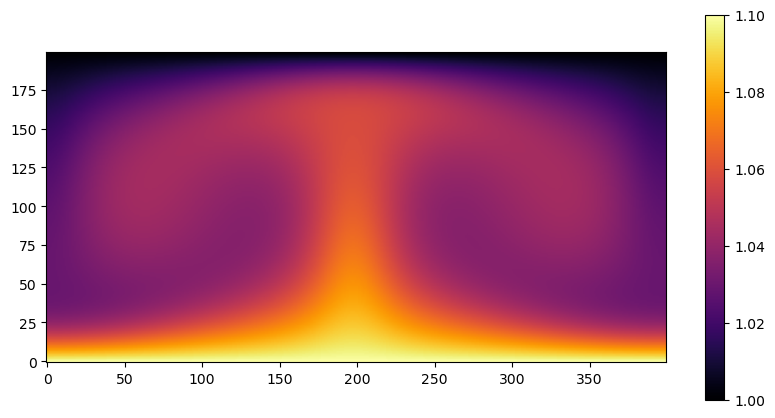

In [43]:
plot_var_name = 'T'

with h5py.File('rayleigh-benard.h5', 'r') as hf:
    keys = list(hf.keys())
    c_key_idx = np.sort([int(k.split('.')[-1]) for k in keys if plot_var_name in k])

    t = c_key_idx[-1]
    plot_var = hf[f'{plot_var_name}.{str(t)}'][()]
    plt.figure(figsize=(10, 5))
    im = plt.imshow(plot_var, cmap='inferno')
    
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
h5_file_name = 'rayleigh-benard.h5'
folder_path = "./T"
plot_var_name = 'T'
every_n_frames = 10
lower_lim = 1.0
upper_lim = 1.1

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")


with h5py.File(h5_file_name, 'r') as hf:
    keys = list(hf.keys())
    c_key_idx = np.sort([int(k.split('.')[-1]) for k in keys if plot_var_name in k])
    # psi = hf['speed.0'][()].T

    for i in range(0, 5000):
        if i % every_n_frames == 0:
            t = c_key_idx[i]
            plot_var = hf[f'{plot_var_name}.{str(t)}'][()]

            # remove all values where psi == 0
            # plot_var *= psi > 0.0

            figsize=(5, 5)
            ax = plt.gca()
            im = plt.imshow(plot_var, cmap='inferno', vmin=lower_lim, vmax=upper_lim)
            plt.gca().invert_yaxis()
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(im, cax=cax)
            cbar.set_label(plot_var_name)
            plt.tight_layout()
            plt.savefig(folder_path + f'/{plot_var_name}_{t:04d}.png', dpi=500, bbox_inches='tight')
            plt.close()


In [ ]:
import os
from moviepy.editor import ImageSequenceClip

folder_path = "./T"
output_video = "T.mp4"
frame_rate = 30  
print(sorted(os.listdir(folder_path)))

image_files = [os.path.join(folder_path, f) for f in sorted(os.listdir(folder_path)) if f.endswith('.png')]

clip = ImageSequenceClip(image_files, fps=frame_rate)

clip.write_videofile(output_video, codec="H.265")

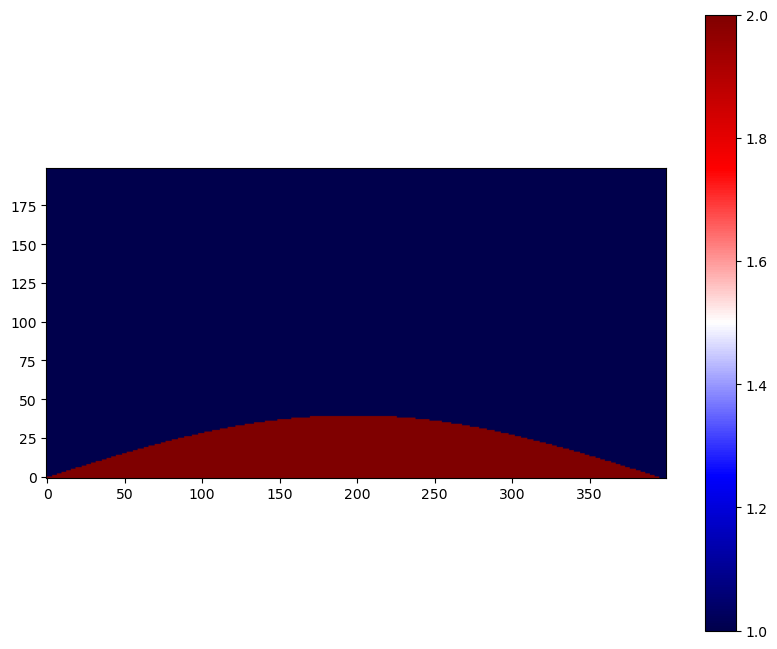

In [ ]:
# preparing initial conditions for temperature map

Nx = 400
Ny = 200

T = np.zeros((Ny, Nx))

T_C = 1.0
T_H = 2.0

x, y = np.meshgrid(np.linspace(0, Nx - 1, Nx), np.linspace(0, Ny - 1, Ny))

freq = Nx/10
Amplitude = Ny/5

EXPRESSION = np.abs(y - np.sin(x / (freq * np.pi)) * Amplitude) + y - np.sin(x / (freq * np.pi)) * Amplitude
EXPRESSION = EXPRESSION / (EXPRESSION + 1.0e-18)
T = T_C * EXPRESSION  - EXPRESSION * T_H + T_H

plt.figure(figsize = (10, 8))
plt.imshow(T, cmap='seismic', origin='lower')
plt.colorbar()